In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('./input/UTKFace'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers  import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
  

In [4]:
folder = './input/UTKFace'

In [5]:
import os
files = os.listdir(folder)

In [ ]:
ages = []
genders = []
images = []
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = folder+'/'+fle
    print(total)

# READ IMAGE

    image = cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

In [9]:
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

In [ ]:
# for showing the image based on their number
plt.imshow(images[45])

In [36]:
print(ages[25])
print(genders[25])

IndexError: list index out of range

In [37]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [38]:
np.save('./results/image.npy', images_f)
np.save('./results/ages.npy', ages_f)
np.save('./results/gender.npy', genders_f)

In [39]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[]


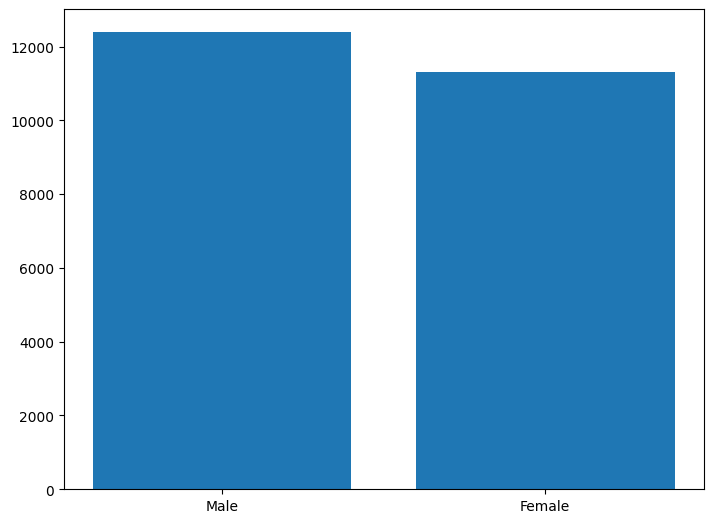

In [40]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values =[12391, 11317]
ax.bar(gender,values)
plt.show()

In [42]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[]


In [43]:
val = values.tolist()
cnt = counts.tolist()

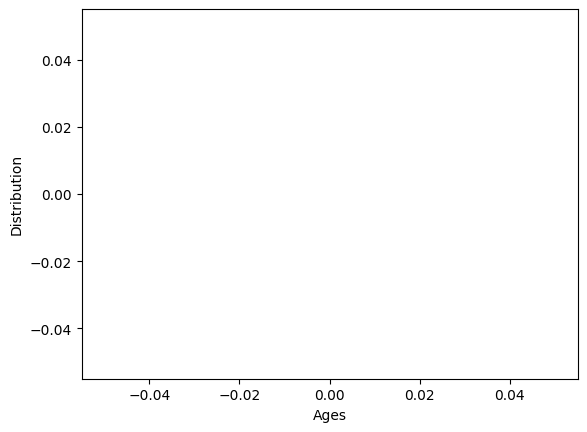

In [44]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [46]:
len(ages)

0

In [47]:
len(genders)

0

In [48]:
labels =[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [49]:
images_f_2= images_f/255

In [50]:
images_f_2.shape

(22829, 48, 48, 3)

In [51]:
len(images_f)

22829

In [52]:
images_f.shape

(22829, 48, 48, 3)

In [53]:
labels_f=np.array(labels)

In [54]:
len(labels_f)

0

In [55]:
labels_f.shape

(0,)

In [56]:
# import libraries - 3
# train test split model:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images_f_2, labels_f, test_size = 0.20)

In [ ]:
y_train[0:5]

In [ ]:
y_train_2 = [y_train[:,1], y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

In [ ]:
y_train_2[0][0:5]

In [ ]:
y_train_2[1][0:5]

In [60]:
def Convolution(input_tensor, filters):
    x=Conv2D(filters=filters, kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [61]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
    
    conv_5=Convolution(maxp_4,512)
    maxp_5=MaxPool2D(pool_size=(2,2))(conv_5)
    
 
    
    flatten = Flatten()(maxp_5)
    dense_1 = Dense(64,activation='relu')(flatten)
    dense_2 = Dense(64,activation='relu')(flatten)
    
    drop_1 = Dropout(0.20)(dense_1)
    drop_2 = Dropout(0.20)(dense_2)
    
    output_1 = Dense(1,activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1,activation='relu', name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [62]:
Model = model((48, 48, 3))

In [64]:
# importing libraries
# model checkpoint:
from tensorflow.keras.callbacks import ModelCheckpoint

In [65]:
fle_s = 'Age_Sex_Detection.h5'
checkpoint = ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list=[checkpoint,Early_stop]

In [ ]:
History = Model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=10, callbacks=callback_list)

In [ ]:
Model.evaluate(x_test,y_test_2)

In [ ]:
pred = Model.predict(x_test)
pred[1]

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

In [ ]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

In [ ]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.scatter([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()])
ax.set_xlabel('Actual Age')
ax.set_ylabel('predict Age')
plt.show()

In [ ]:
i=0
Pred_d=[]
while(i<len(pred[0])):
    Pred_d.append(int(np.round(pred[0][i])))
    i=i+1

In [71]:
# importing libraries:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test_2[0],Pred_d)
print(report)

In [ ]:
results = confusion_matrix(y_test_2[0],Pred_d)

In [ ]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [75]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l= Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

In [ ]:
test_image(3244,images_f,images_f_2,Model)

In [ ]:
test_image(88,images_f,images_f_2,Model)

In [ ]:
test_image(8878,images_f,images_f_2,Model)

In [ ]:
test_image(4578,images_f,images_f_2,Model)